In [120]:
import numpy as np

coords = np.array([[-1.8, -1, 0.2, 1.2, 2], [5.69, 1.99, 1.24, 9.81, 14.5]])

coords_transposed = coords.T
print(coords_transposed)

[[-1.8   5.69]
 [-1.    1.99]
 [ 0.2   1.24]
 [ 1.2   9.81]
 [ 2.   14.5 ]]


In [121]:
m = 1
xi = coords_transposed[:, 0]
yi = coords_transposed[:, 1]
s = np.zeros((1, m*2+1))

for x in xi:
    temp = np.array([])
    for k in range(0, m*2+1):
        temp = np.append(temp, x**k)
    s = np.vstack((s, temp))


sk = np.sum(s, axis=0)
s = np.vstack((s, sk))
s = np.delete(s, 0, 0)
print(s)

[[ 1.   -1.8   3.24]
 [ 1.   -1.    1.  ]
 [ 1.    0.2   0.04]
 [ 1.    1.2   1.44]
 [ 1.    2.    4.  ]
 [ 5.    0.6   9.72]]


In [122]:
# tworzymy wstępną macierz wyników i nadajemy jej kształt, wypełniając zerami
wyn = np.zeros((1, m+1))

# uruchamiamy pętle m+1 razy, gdyż taka będzie liczba kolumn w macierzy wyników
for i in range(m+1):
    # tworzymy tymczasową macierz, która będzie zawierała kolejne elementy wiersza
    temp = np.array([])
    # uruchamiamy pętle m+1 razy, gdyż taka będzie liczba elementów w wierszu
    for j in range(m+1):
        # dodajemy kolejne elementy do tymczasowej macierzy
        temp = np.append(temp, sk[i+j])
    # dodajemy wiersz do macierzy wyników
    wyn = np.vstack((wyn, temp))

# usuwamy pierwszy wiersz, który zawierał tylko zera
S = np.delete(wyn, 0, 0)
print(S)

[[5.   0.6 ]
 [0.6  9.72]]


In [123]:
tk = np.zeros((1, m+1))

for index, x in enumerate(xi):
    temp = np.array([])
    for k in range(0, m+1):
        temp = np.append(temp, x**k * yi[index])
    tk = np.vstack((tk, temp))
tk = np.delete(tk, 0, 0)
Tk = np.sum(tk, axis=0)
print(Tk)

[33.23  28.788]


In [124]:
S_inverse = np.linalg.inv(S)
print(S_inverse)

[[ 0.20149254 -0.01243781]
 [-0.01243781  0.10364842]]


In [125]:
A = np.dot(S_inverse, Tk)
print(A)

[6.33753731 2.57052239]


In [126]:
import sympy as sp
x = sp.Symbol('x')

result_array = np.array([])
for index, a in enumerate(A):
    result_array = np.append(result_array, a * x**index)

result = np.sum(result_array)
print(result)

2.5705223880597*x + 6.33753731343284


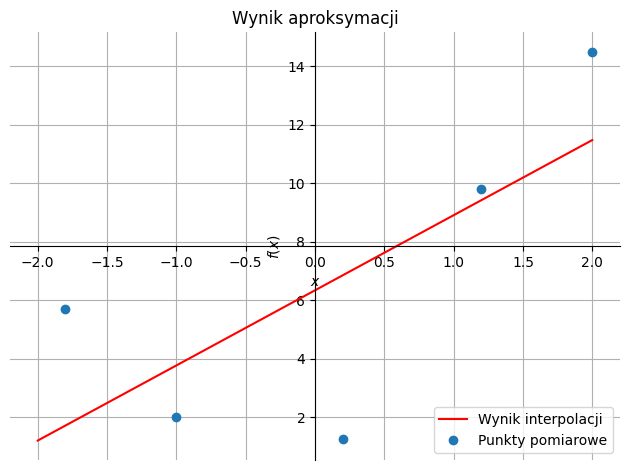

In [127]:
from sympy.plotting.plot import MatplotlibBackend, Plot

# funkcja zwracająca wykres z biblioteki sympy
# Używana z powodu konieczności połączenia wielu wykresów w jeden
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

p1 = sp.plot(result, (x, -2, 2),  show=False, line_color='red')
p1.title = 'Wynik aproksymacji'
fig, axe = get_sympy_subplots(p1)
# Dodatkowe wykresy-tu punkty interpolacji
axe.plot(xi, yi, "o")
axe.legend(['Wynik interpolacji', 'Punkty pomiarowe'], loc='lower right')
axe.grid()